In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Pref_label = pd.read_csv('data/Pref_lbl_Red_08_07.csv')
AltLabels_red = pd.read_csv("data/AltLabels_red04_07.csv")
Pref_label = Pref_label[['preferredLabel_x','Reduced_pref_com','Reduced_pref_obj','Reduced_pref_amod']]
AltLabels_red = AltLabels_red[['Skill','Reduced_pref_com2','Reduced_pref_obj2','Reduced_pref_amod2']]

In [3]:
Pref_label.head(2)

,preferredLabel_x,Reduced_pref_com,Reduced_pref_obj,Reduced_pref_amod
0,control compliance of railway vehicles regulat...,control compliance_com,No change,No change
1,handle fish harvesting waste,fish harvesting waste_com,No change,No change


In [4]:
AltLabels_red.head(2)

,Skill,Reduced_pref_com2,Reduced_pref_obj2,Reduced_pref_amod2
0,apply diagnostic procedures relevant to vascul...,No change,apply diagnostic procedures_obj,diagnostic procedures relevant to vascular sur...
1,watch fans for machines,No change,watch fans_obj,No change


### Initial state of preferred labels and alternative labels

Text(0.5, 1.0, 'Preferred Labels')

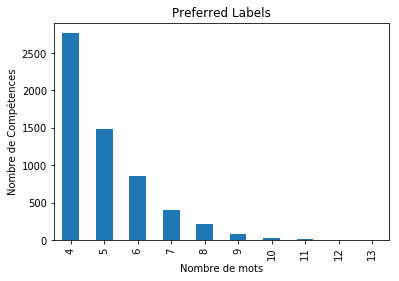

In [5]:
Pref_label.preferredLabel_x.apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Preferred Labels")

Text(0.5, 1.0, 'Alternative Labels')

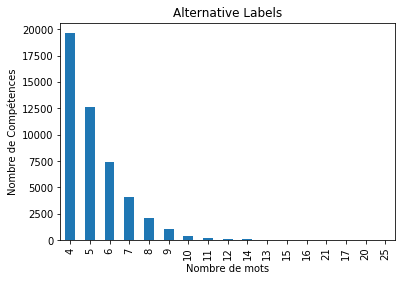

In [19]:
AltLabels_red.Skill.apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Alternative Labels")

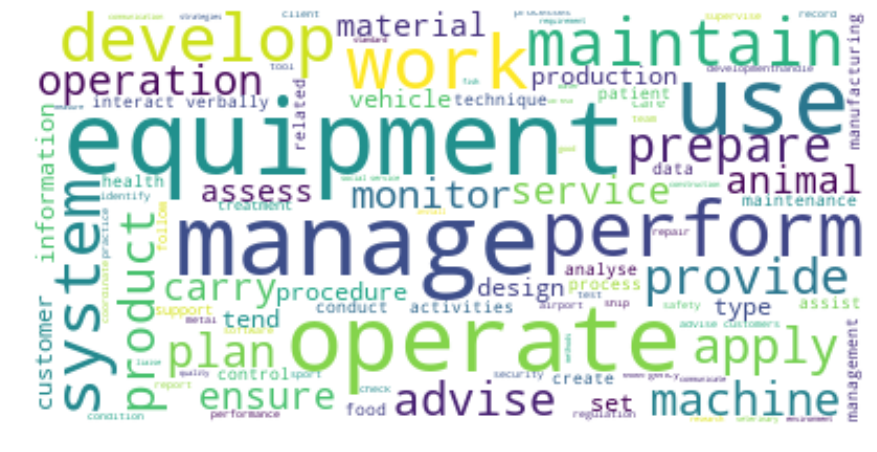

In [22]:
text = " ".join(Pref_label.preferredLabel_x)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

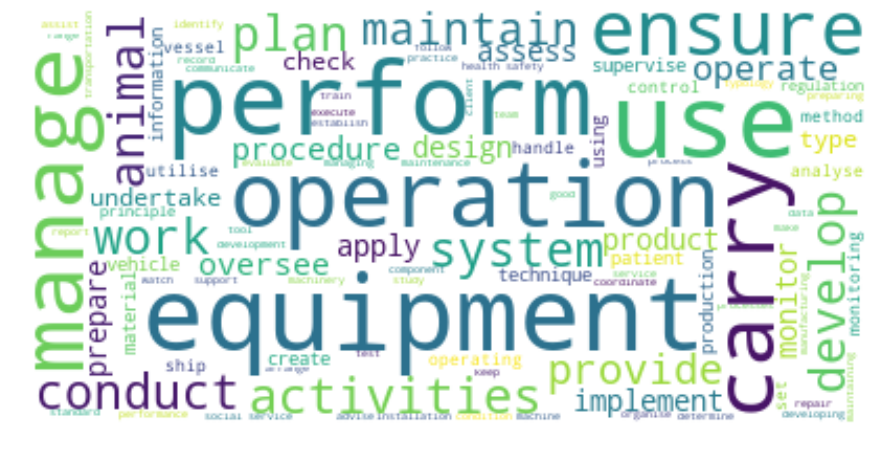

In [23]:
text = " ".join(AltLabels_red.Skill)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Compound nouns com

<img src="com.png">

#### Preferred labels

In [47]:
Listofred_com = Pref_label.Reduced_pref_com[Pref_label.Reduced_pref_com != "No change"].apply(lambda x:x.split("_")[0])
print("Preferred labels reduced by compound nouns :",len(Listofred_com))
print("All preferred labels :",len(Pref_label))

Preferred labels reduced by compound nouns : 3519
All preferred labels : 5848


### Examples com

In [82]:
print(list(Pref_label.preferredLabel_x[Pref_label.Reduced_pref_com != "No change"].apply(lambda x:x.split("_")[0]))[:10])

['control compliance of railway vehicles regulations', 'handle fish harvesting waste', 'develop energy saving concepts', 'perform street interventions in social work', 'apply credit risk policy', 'handle customer requests related to cargo', 'manufacture wearing apparel products', 'maintain inventory of cleaning supplies', 'act as contact person during equipment incident', 'carry out parts purchasing']


In [83]:
print(list(Listofred_com[:10]))

['control compliance', 'fish harvesting waste', 'energy saving concepts', 'street interventions', 'credit risk policy', 'customer requests', 'apparel products', 'cleaning supplies', 'contact person', 'parts purchasing']


Text(0.5, 1.0, 'Preferred Labels')

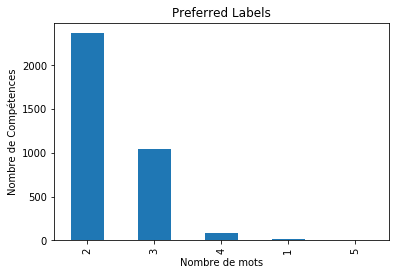

In [35]:
Pref_label.Reduced_pref_com[Pref_label.Reduced_pref_com != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Preferred Labels")

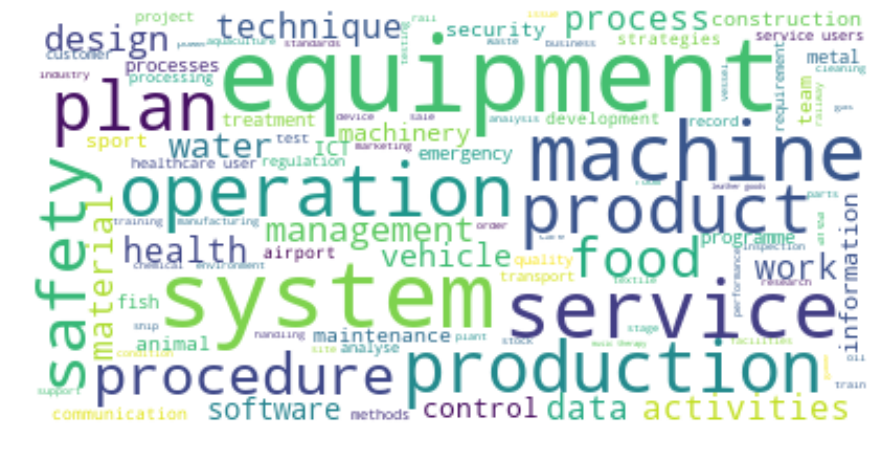

In [36]:
text = " ".join(Listofred_com)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Alternative labels

In [46]:
Listofred_com = AltLabels_red.Reduced_pref_com2[AltLabels_red.Reduced_pref_com2 != "No change"].apply(lambda x:x.split("_")[0])
print("Alternative labels reduced by compound nouns :",len(Listofred_com))
print("All Alternative labels :",len(AltLabels_red))

Alternative labels by compound nouns : 27719
All Alternative labels : 47603


Text(0.5, 1.0, 'Alternative Labels')

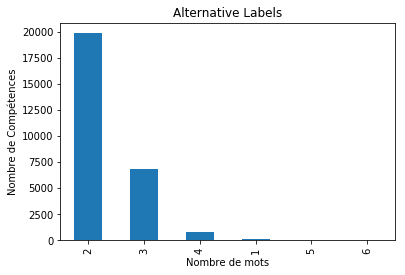

In [88]:
AltLabels_red.Reduced_pref_com2[AltLabels_red.Reduced_pref_com2 != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Alternative Labels")

##### We can delete all the skills that are composed of more than 4 words

# Adjective modifier adj
- with adjective modifiers, we end-up reducing skills but with forms that are more complex than those obtained by compound nouns

<img src="amod.png">

#### Preferred labels

In [72]:
Listofred_adj = Pref_label.Reduced_pref_amod[Pref_label.Reduced_pref_amod != "No change"].apply(lambda x:x.split("_")[0])
print("Preferred labels reduced by adjective modifiers :",len(Listofred_adj))
print("All preferred labels :",len(Pref_label))

Preferred labels reduced by adjective modifiers : 2638
All preferred labels : 5848


Text(0.5, 1.0, 'Preferred Labels')

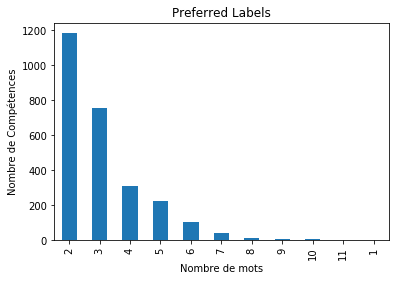

In [56]:
Pref_label.Reduced_pref_amod[Pref_label.Reduced_pref_amod != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Preferred Labels")

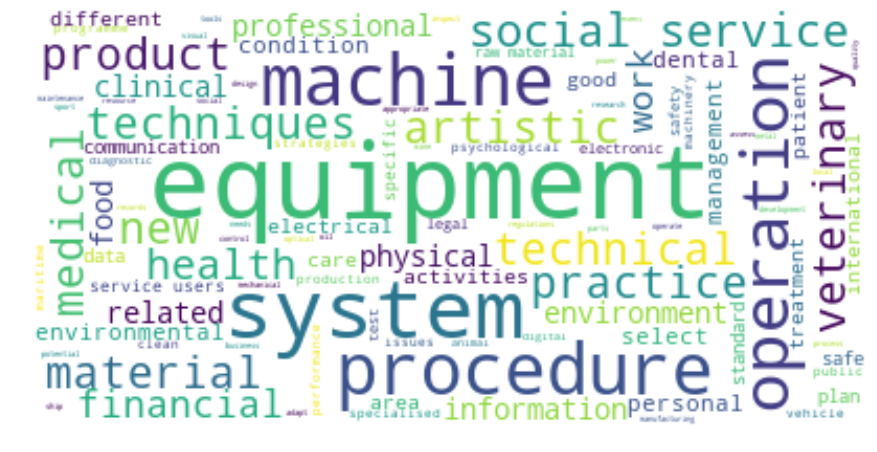

In [57]:
text = " ".join(Listofred_adj)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Examples amod

In [85]:
print(list(Pref_label.preferredLabel_x[Pref_label.Reduced_pref_amod != "No change"].apply(lambda x:x.split("_")[0]))[:10])

['perform street interventions in social work', 'utilise advanced clinical skills', 'assess nutritional characteristics of food', 'transport patient to medical facility', 'maintain personal hygiene standards when cleaning', 'peform small vessel administrative duties', 'medico-biological and medical sciences related to dentistry', 'develop efficiency plans for maritime shipping', 'analyse the artistic concept based on stage actions', 'human factors regarding safety']


In [86]:
print(list(Pref_label.Reduced_pref_amod[Pref_label.Reduced_pref_amod != "No change"].apply(lambda x:x.split("_")[0]))[:10])

['social work', 'utilise advanced clinical skills', 'nutritional characteristics of food', 'medical facility', 'personal hygiene standards when cleaning', 'small vessel administrative duties', 'medico-biological and medical sciences', 'maritime shipping', 'artistic concept based on stage actions', 'human factors']


#### Alternative labels

In [71]:
Listofred_adj = AltLabels_red.Reduced_pref_amod2[AltLabels_red.Reduced_pref_amod2 != "No change"].apply(lambda x:x.split("_")[0])
print("Alternative labels reduced by adjective modifiers :",len(Listofred_adj))
print("All Alternative labels :",len(AltLabels_red))

Alternative labels reduced by adjective modifiers : 20661
All Alternative labels : 47603


Text(0.5, 1.0, 'Alternative Labels')

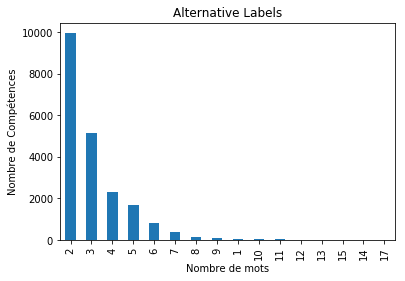

In [89]:
AltLabels_red.Reduced_pref_amod2[AltLabels_red.Reduced_pref_amod2 != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Alternative Labels")

# Direct Object dobj
- direct object yields shorter reduced forms than the adjective modifier method
<img src="dobj.png">

#### Preferred labels

In [74]:
Listofred_obj = Pref_label.Reduced_pref_obj[Pref_label.Reduced_pref_obj != "No change"].apply(lambda x:x.split("_")[0])
print("Preferred labels reduced by direct object :",len(Listofred_obj))
print("All preferred labels :",len(Pref_label))

Preferred labels reduced by direct object : 2103
All preferred labels : 5848


Text(0.5, 1.0, 'Preferred Labels')

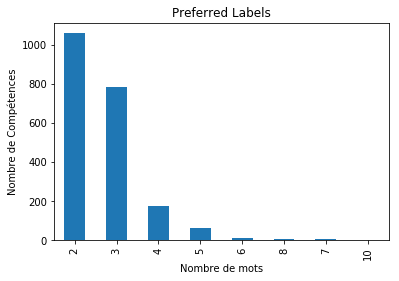

In [75]:
Pref_label.Reduced_pref_obj[Pref_label.Reduced_pref_obj != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Preferred Labels")

### In the cas of Direct objects the word cloud showcases the verbs more than any other terms

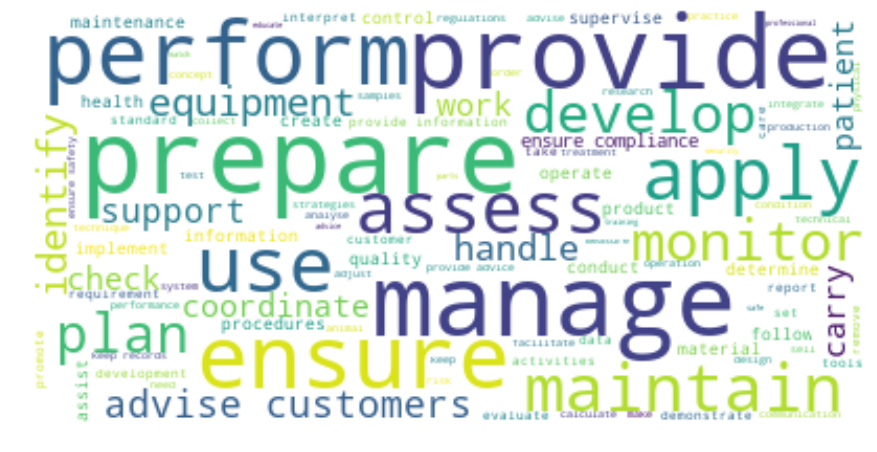

In [77]:
text = " ".join(Listofred_obj)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Examples dobj

In [80]:
print(list(Pref_label.preferredLabel_x[Pref_label.Reduced_pref_obj != "No change"].apply(lambda x:x.split("_")[0]))[:10])

['perform street interventions in social work', 'conduct research on flora', 'handle equipment while suspended', 'handle customer requests related to cargo', 'maintain inventory of cleaning supplies', 'manage time in landscaping', 'assess nutritional characteristics of food', 'transport patient to medical facility', 'pursue excellence in the creation of food products', 'maintain personal hygiene standards when cleaning']


In [81]:
print(list(Pref_label.Reduced_pref_obj[Pref_label.Reduced_pref_obj != "No change"].apply(lambda x:x.split("_")[0]))[:10])

['perform street interventions', 'conduct research', 'handle equipment', 'handle customer requests', 'maintain inventory', 'manage time', 'assess nutritional characteristics', 'transport patient', 'pursue excellence', 'maintain personal hygiene standards']


#### Alternative labels

In [78]:
Listofred_adj = AltLabels_red.Reduced_pref_obj2[AltLabels_red.Reduced_pref_obj2 != "No change"].apply(lambda x:x.split("_")[0])
print("Alternative labels reduced by adjective modifiers :",len(Listofred_adj))
print("All Alternative labels :",len(AltLabels_red))

Alternative labels reduced by adjective modifiers : 16918
All Alternative labels : 47603


Text(0.5, 1.0, 'Alternative Labels')

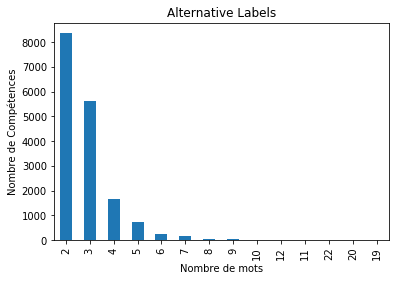

In [90]:
AltLabels_red.Reduced_pref_obj2[AltLabels_red.Reduced_pref_obj2 != "No change"].apply(lambda x:x.split("_")[0]).apply(lambda x:len(x.split(" "))).value_counts().plot.bar()
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de Compétences")
plt.title("Alternative Labels")

### For pref labels what if we took the less complex form of reduction and see

In [8]:
AltLabels_red[['Reduced_pref_com2', 'Reduced_pref_obj2', 'Reduced_pref_amod2']].applymap(
    lambda x: len(x.split(" ")) if x != 'No change' else 99).head()

,Reduced_pref_com2,Reduced_pref_obj2,Reduced_pref_amod2
0,99,3,6
1,99,2,99
2,99,99,2
3,2,99,99
4,99,99,99


### We see that 31979 skills have a 2 word reduced form and 8630 composed of 3 words

In [10]:
AltLabels_red[['Reduced_pref_com2', 'Reduced_pref_obj2', 'Reduced_pref_amod2']].applymap(lambda x: len(x.split(" "))
                if x != 'No change' else 99).apply(lambda x: min(x), axis=1).value_counts()

2     31979
3      8630
99     4028
4      1826
5       532
1       213
6       188
7       155
8        26
9        17
10        4
11        2
17        1
15        1
12        1
dtype: int64

### only 2966 alternative appelations have reduced forms composed with 4 words or more

### Preferred labels 
- 99 means no change

In [9]:
Pref_label[['Reduced_pref_com', 'Reduced_pref_obj', 'Reduced_pref_amod']].applymap(lambda x: len(x.split(" "))
                if x != 'No change' else 99).apply(lambda x: min(x), axis=1).value_counts()

2     3817
3     1319
99     423
4      190
5       53
1       21
6       18
7        5
8        2
dtype: int64